<a href="https://colab.research.google.com/github/ReidelVichot/Relationship_Pollution-LC/blob/main/PreliminaryDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpuse of this notebook is to understand and explore some of the data on pollution.

https://aqs.epa.gov/aqsweb/airdata/FileFormats.html This website describes the content of the different datasets.

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 39.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import requests
import geopandas
from zipfile import ZipFile

In [3]:
#Import and extract file
#Update these variables
zip_url = "https://aqs.epa.gov/aqsweb/airdata/annual_conc_by_monitor_2022.zip"
zip_file = "annual_conc_by_monitor_2022"
csv_file = "annual_conc_by_monitor_2022.csv"

#Get the zip from the website
req = requests.get(zip_url, allow_redirects=True)

#Open the zip as a file
with open(zip_file, "wb") as file:
    file.write(req.content)

#Extract the zip
with ZipFile(zip_file, 'r') as zipObj:
   zipObj.extractall()


In [4]:
df = pd.read_csv(csv_file, low_memory= False)

In [5]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [6]:
gdf

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.048,0.030,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08,POINT (-87.88026 30.49748)
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08,POINT (-87.88026 30.49748)
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08,POINT (-87.88026 30.49748)
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08,POINT (-87.88026 30.49748)
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.300,4.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-10-13,POINT (-87.88026 30.49748)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882,80,26,6,88101,1,31.291293,-110.951513,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,7.800,4.800,Nogales Sonora Institute ITN,"Avenida Instituto Tecnologico #911, Granja, 84...",Country Of Mexico,SONORA,NaN,NaN,2022-10-13,POINT (-110.95151 31.29129)
51883,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.048,0.037,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14,POINT (-114.76861 32.46639)
51884,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14,POINT (-114.76861 32.46639)
51885,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14,POINT (-114.76861 32.46639)


In [7]:
gdf = gdf[gdf["State Code"]==34]

<Axes: >

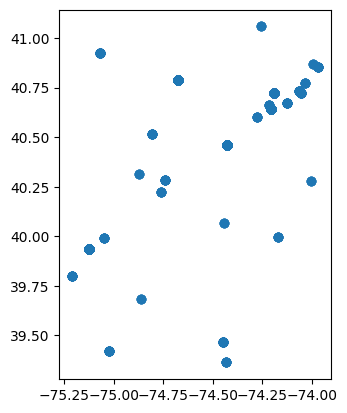

In [8]:
gdf.plot()

In [9]:
NJ_shape = "https://www2.census.gov/geo/tiger/TIGER2016/COUSUB/tl_2016_34_cousub.zip"

import urllib.request

url = 'https://www2.census.gov/geo/tiger/TIGER2016/COUSUB/tl_2016_34_cousub.zip'
filename = 'tl_2016_34_cousub.zip'

urllib.request.urlretrieve(url, filename)

import zipfile
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

import geopandas as gpd

shapefile = 'tl_2016_34_cousub.shp'

NJ_counties = gpd.read_file(shapefile)

<Axes: >

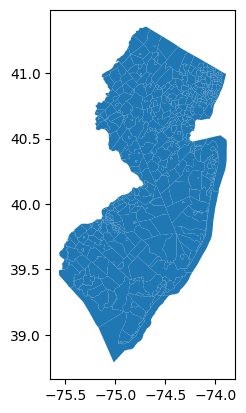

In [10]:
NJ_counties.plot()

In [11]:
import urllib.request

url = 'https://www2.census.gov/geo/tiger/TIGER2022/COUNTY/tl_2022_us_county.zip'
filename = 'tl_2022_us_county.zip'

urllib.request.urlretrieve(url, filename)

import zipfile
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

import geopandas as gpd

shapefile = 'tl_2022_us_county.zip'

US_counties = gpd.read_file(shapefile)

In [12]:
US_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,NaN,NaN,NaN,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,NaN,NaN,NaN,A,4329793477,16913514,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,NaN,NaN,NaN,A,1850178077,71698127,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,NaN,NaN,NaN,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [19]:
NJ_counties = US_counties[US_counties["STATEFP"]=="34"]

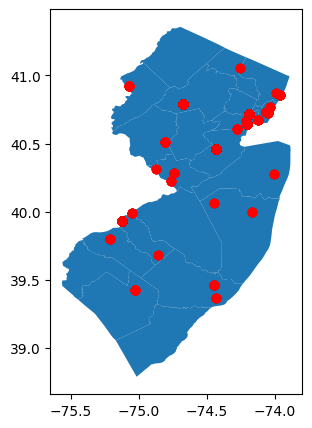

In [24]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(figsize=(5,5))

NJ_counties.plot(ax=ax)
gdf.plot(ax=ax, color="r")
fig.show()